# Evaluation Metric: MAP@10 (Mean Average Precision at 10)

This notebook explains the evaluation metric used in our Kaggle competition - **MAP@10** (Mean Average Precision at 10).



## 🎯 What is MAP@10?

**MAP@10** is a ranking evaluation metric that measures how well our recommendation system performs by looking at the **top 10 recommendations** for each user.

### Key Formula:
```
MAP@10 = (1/|U|) × Σ(u∈U) AP@10(u)
```

Where:
- **U** = Set of all users
- **AP@10(u)** = Average Precision at 10 for user u
- We take the **average** across all users


## 📊 Breaking Down AP@10 (Average Precision at 10)

For each individual user **u**, we calculate:

```
AP@10(u) = (1/min(|R_u|, 10)) × Σ(k=1 to 10) P_u(k) × rel_u(k)
```

### Components:
- **R_u** = Set of relevant (true) items for user u
- **P_u(k)** = Precision at position k = (# of relevant items in top k) / k
- **rel_u(k)** = 1 if item at position k is relevant, 0 otherwise

### 🔍 What this means:
- We only look at the **first 10 recommendations**
- We calculate precision at each position (1st, 2nd, 3rd, ... 10th)
- We only count positions where we made a **correct recommendation**
- We normalize by the number of possible relevant items (max 10)


## 💡 Simple Example

Let's say we have a user with **3 relevant items** in total, and our system makes these top-10 recommendations:

| Position (k) | Recommended Item | Relevant? | rel_u(k) | Precision P_u(k) |
|--------------|------------------|-----------|----------|------------------|
| 1            | Item A           | ✅ Yes    | 1        | 1/1 = 1.00       |
| 2            | Item B           | ❌ No     | 0        | 1/2 = 0.50       |
| 3            | Item C           | ✅ Yes    | 1        | 2/3 = 0.67       |
| 4            | Item D           | ❌ No     | 0        | 2/4 = 0.50       |
| 5            | Item E           | ✅ Yes    | 1        | 3/5 = 0.60       |
| 6-10         | Items F-J        | ❌ No     | 0        | ...              |

### Calculation:
```
AP@10 = (1/min(3,10)) × [1×1.00 + 0×0.50 + 1×0.67 + 0×0.50 + 1×0.60 + 0×...]
AP@10 = (1/3) × [1.00 + 0.67 + 0.60]
AP@10 = (1/3) × 2.27 = 0.757
```

**This user gets an AP@10 score of 0.757**


## 🎪 Visual Representation

Let's create a simple visualization to understand how MAP@10 works:


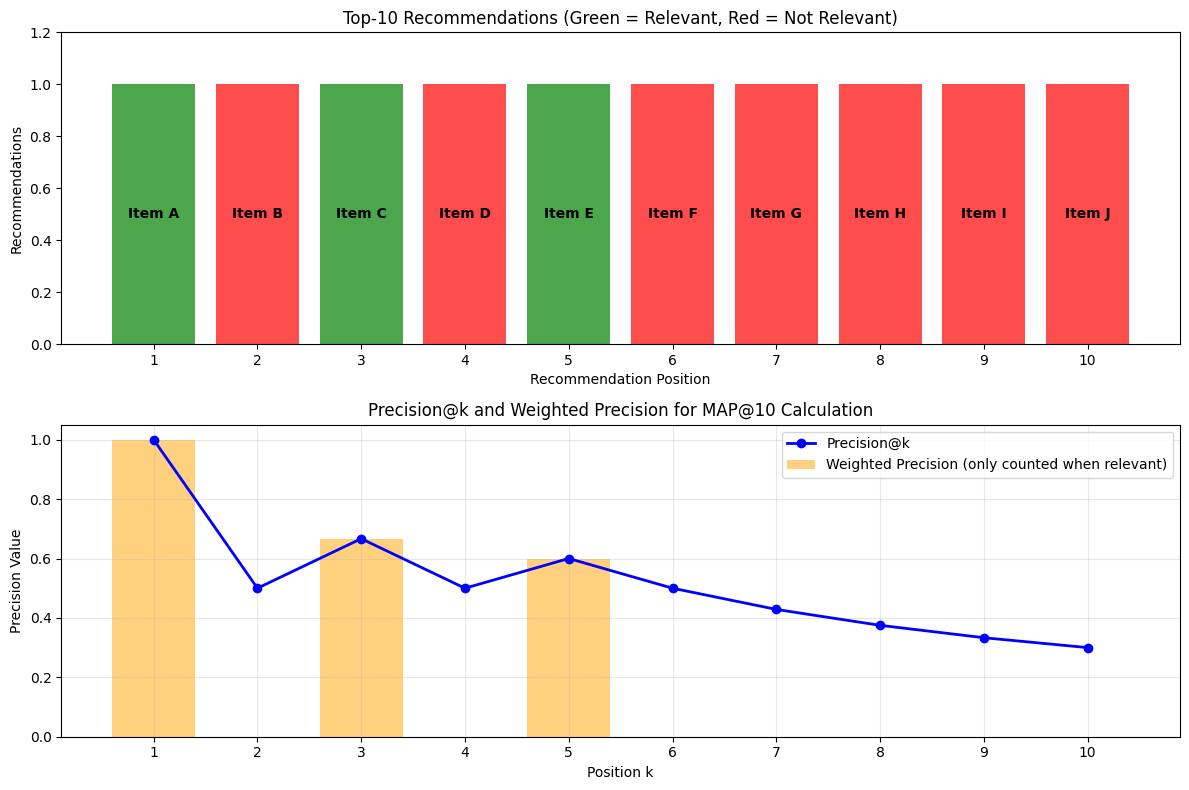


📊 Calculation Results:
Number of relevant items found: 3
Sum of weighted precisions: 2.267
AP@10 for this user: 0.756


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example recommendation scenario
positions = np.arange(1, 11)
recommendations = ['Item A', 'Item B', 'Item C', 'Item D', 'Item E', 
                  'Item F', 'Item G', 'Item H', 'Item I', 'Item J']
relevant = [1, 0, 1, 0, 1, 0, 0, 0, 0, 0]  # 1 = relevant, 0 = not relevant
colors = ['green' if r else 'red' for r in relevant]

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Top plot: Recommendations with relevance
bars1 = ax1.bar(positions, [1]*10, color=colors, alpha=0.7)
ax1.set_xlabel('Recommendation Position')
ax1.set_ylabel('Recommendations')
ax1.set_title('Top-10 Recommendations (Green = Relevant, Red = Not Relevant)')
ax1.set_xticks(positions)
ax1.set_ylim(0, 1.2)

# Add item labels
for i, (pos, item) in enumerate(zip(positions, recommendations)):
    ax1.text(pos, 0.5, item, ha='center', va='center', fontweight='bold')

# Bottom plot: Cumulative precision
cumulative_hits = np.cumsum(relevant)
precision_at_k = cumulative_hits / positions
weighted_precision = [p * r for p, r in zip(precision_at_k, relevant)]

ax2.plot(positions, precision_at_k, 'bo-', linewidth=2, markersize=6, label='Precision@k')
ax2.bar(positions, weighted_precision, alpha=0.5, color='orange', 
        label='Weighted Precision (only counted when relevant)')
ax2.set_xlabel('Position k')
ax2.set_ylabel('Precision Value')
ax2.set_title('Precision@k and Weighted Precision for MAP@10 Calculation')
ax2.set_xticks(positions)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and display the final AP@10
relevant_items_count = sum(relevant)
ap_10 = sum(weighted_precision) / min(relevant_items_count, 10)
print(f"\n📊 Calculation Results:")
print(f"Number of relevant items found: {relevant_items_count}")
print(f"Sum of weighted precisions: {sum(weighted_precision):.3f}")
print(f"AP@10 for this user: {ap_10:.3f}")


## 🔑 Key Insights

### Why MAP@10 is Important:

1. **🎯 Position Matters**: Earlier relevant recommendations contribute more to the score
2. **⚖️ Balanced Metric**: Considers both precision and the ranking order
3. **📏 Standardized**: Scores range from 0 to 1, making comparison easy
4. **👥 User-Centric**: Calculated per user, then averaged across all users

### What Makes a Good MAP@10 Score:

- **Perfect Score (1.0)**: All relevant items appear at the very beginning of recommendations
- **Good Score (0.7-0.9)**: Most relevant items appear in early positions
- **Poor Score (0.0-0.3)**: Few relevant items found, or they appear late in the ranking

### 📈 To Improve MAP@10:
- Focus on getting relevant items **higher in the ranking**
- Improve the **quality** of top recommendations
- Balance between **precision** and **recall** in your recommendation system


## 🏆 Summary

**MAP@10** is the evaluation metric for this competition. It measures how well our recommendation system ranks relevant items within the top 10 positions.

### The Final Formula:
```
MAP@10 = Average of AP@10 scores across all users
```

Where each user's AP@10 considers:
- ✅ **Which** of our top-10 recommendations are correct
- 📍 **Where** these correct recommendations appear in the ranking
- 🎯 **How many** relevant items the user actually has

### 💡 Remember:
- **Higher is better** (max score = 1.0)
- **Position matters** - relevant items should appear early
- **Every user counts** - we average across all users in the dataset

This metric ensures we build recommendation systems that are both **accurate** and **well-ordered**! 🚀
